In [27]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import misc
from scipy.signal import convolve2d
from skimage import color, data, restoration
%matplotlib inline

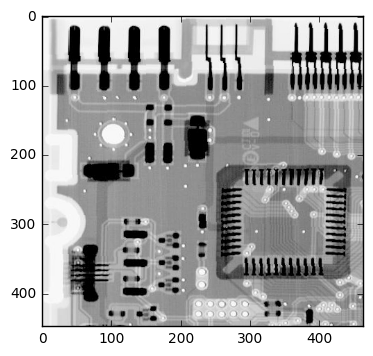

In [23]:
img = misc.imread('circuit.jpg')
plt.imshow(img, cmap='gray')

# Gaussian Noise

In [9]:
def gaussian_noise(image, mean=0, sigma=1):
    if len(image.shape) == 3:
        row, col, ch = image.shape
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        noisy = image + gauss
    
    else:
        row, col = image.shape
        gauss = np.random.normal(mean, sigma, (row, col))
        noisy = image + gauss
        
    return noisy

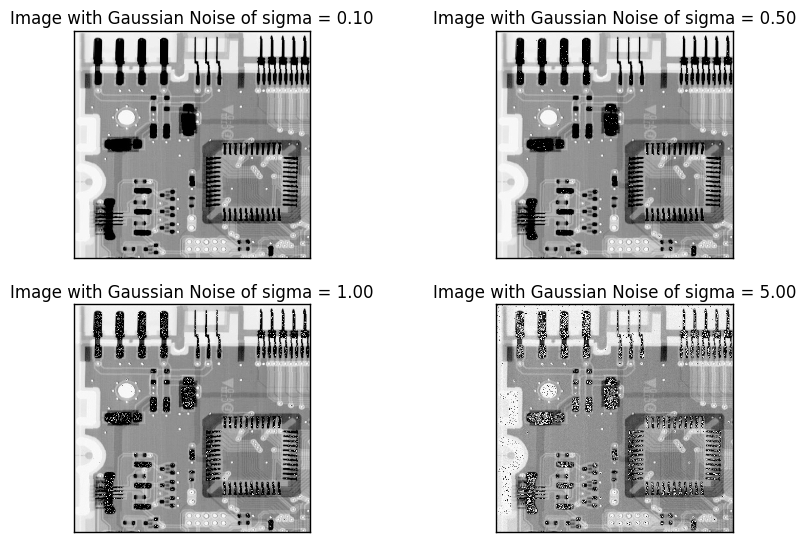

In [21]:
sigmas = [0.1, 0.5, 1, 5]
plt.figure(figsize=(10,10))
columns = 2
for i,sigma in enumerate(sigmas):
    img_ = gaussian_noise(img, sigma=sigma).astype(np.uint8)
    plt.subplot(len(sigmas)/columns + 1, columns, i+1)
    plt.title('Image with Gaussian Noise of sigma = %.2f' % sigma)
    plt.imshow(img_, cmap='gray')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Salt & Pepper Noise

In [ ]:
def salt_and_pepper(image, s_vs_p=0.5, amount=0.1):
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    out[coords] = 0
    
    return out

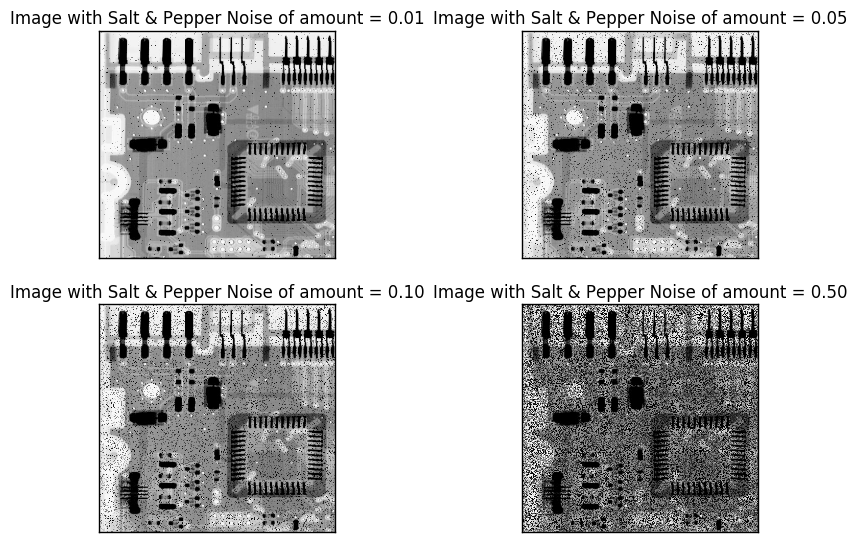

In [22]:
amounts = [0.01, 0.05, 0.1, 0.5]
plt.figure(figsize=(10,10))
columns = 2
for i,amount in enumerate(amounts):
    img_ = salt_and_pepper(img, amount=amount).astype(np.uint8)
    plt.subplot(len(amounts)/columns + 1, columns, i+1)
    plt.title('Image with Salt & Pepper Noise of amount = %.2f' % amount)
    plt.imshow(img_, cmap='gray')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# Wiener Filtering

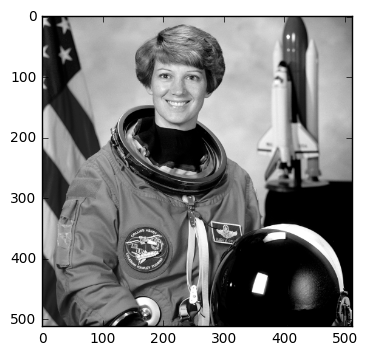

In [26]:
img = color.rgb2gray(data.astronaut())
plt.imshow(img, cmap='gray')

In [28]:
psf = np.ones((5, 5)) / 25

In [29]:
img = convolve2d(img, psf, 'same')

In [30]:
img += 0.1 * img.std() * np.random.standard_normal(img.shape)

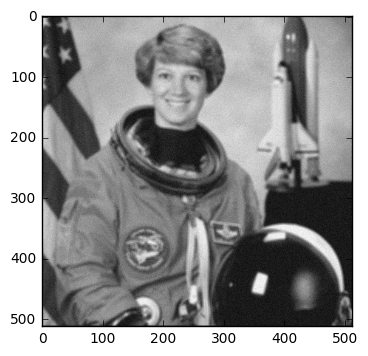

In [43]:
plt.imshow(img,  cmap='gray')

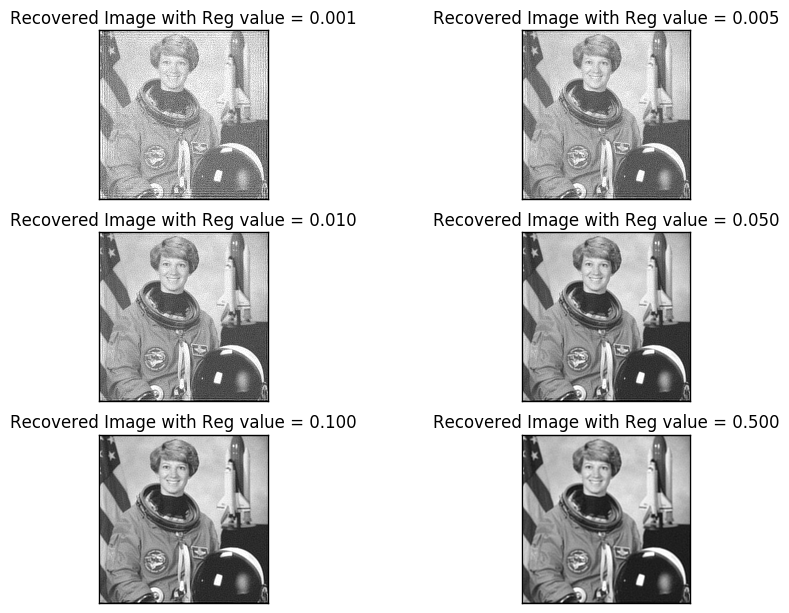

In [52]:
values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
plt.figure(figsize=(10,10))
columns = 2
for i,value in enumerate(values):
    img_ = restoration.wiener(img, psf, value)
    plt.subplot(len(values)/columns + 1, columns, i+1)
    plt.title('Recovered Image with Reg value = %.3f' % value)
    plt.imshow(img_, cmap='gray')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()